# Lectura de Datos

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import imblearn as imb

In [3]:
df = pd.read_csv('../data/practica_micro.csv')

In [3]:
df.head(5)

,MALDI_binned,Erythromycin,Ciprofloxacin
0,"[0.0002535866911222, 0.0003949856891622, 0.000...",0.0,0.0
1,"[0.0003393276603384, 0.0002025633325117, 9.727...",0.0,0.0
2,"[0.0001225308701019, 0.0001617988864636, 8.873...",1.0,0.0
3,"[0.0002821877594324, 0.0006081195988659, 0.000...",0.0,1.0
4,"[0.0003700831426878, 0.0002433899375037, 0.000...",0.0,0.0


In [5]:
import ast

# Check the type of the first element in the MALDI_binned column
print(type(df['MALDI_binned'][0]))
# Convert the string representation of the list to an actual list
maldi_binned_array = ast.literal_eval(df['MALDI_binned'][0])
print(maldi_binned_array)
print(len(maldi_binned_array))

<class 'str'>
[0.0002535866911222, 0.0003949856891622, 0.0004533690825483, 0.0004953216780413, 0.0008012085185987, 0.0008793455192386, 0.0012961220967862, 0.0006312828282373, 4.0394777001594826e-05, 0.000295282659393, 0.0003687859365949, 0.0012783453298406, 0.0017682271395382, 0.0004129705016985, 0.0003170160061868, 0.0001618232416572, 0.0001875933121845, 0.0006287339863895, 0.0001075904408587, 0.000398210335119, 0.0007859624116585, 0.0007895175064824, 0.0048455789477684, 0.0041967482820869, 0.0012349824294868, 0.000906808546419, 0.0007487232514814, 0.0015765870081945, 0.0014077214570617, 0.0007019698226819, 0.0009083381178855, 0.0004739187460689, 0.0004336320460545, 0.0002154731337296, 0.0010873069596135, 0.0036709677641779, 0.0024063463630106, 0.0003269931521057, 0.0003229528879152, 0.0004522419616509, 0.0005489280692616, 0.0011062038590318, 0.000463596941081, 0.0007283674671026, 0.0003652265646089, 0.0005631994440972, 0.0016751924518845, 0.0006053169935411, 0.0004375373537665, 0.000

Pasar a 6000 columnas para features extraction / selection

In [6]:
# Convert the 'MALDI_binned' column from string representation of list to actual list
df['MALDI_binned'] = df['MALDI_binned'].apply(ast.literal_eval)

# Create a new DataFrame with 6000 columns from the 'MALDI_binned' column
maldi_binned_df = pd.DataFrame(df['MALDI_binned'].tolist(), index=df.index)

# Concatenate the new DataFrame with the original DataFrame (excluding the original 'MALDI_binned' column)
df_expanded = pd.concat([maldi_binned_df, df.drop(columns=['MALDI_binned'])], axis=1)

# Display the new DataFrame
df_expanded.head()

,0,1,2,3,4,5,6,7,8,9,...,5992,5993,5994,5995,5996,5997,5998,5999,Erythromycin,Ciprofloxacin
0,0.000254,0.000395,0.000453,0.000495,0.000801,0.000879,0.001296,0.000631,0.000040,0.000295,...,0.000023,0.000062,0.000061,0.000056,0.000071,0.000052,0.000044,0.000025,0.0,0.0
1,0.000339,0.000203,0.000097,0.000844,0.000769,0.000667,0.000974,0.000557,0.000116,0.000038,...,0.000056,0.000074,0.000096,0.000154,0.000075,0.000067,0.000042,0.000022,0.0,0.0
2,0.000123,0.000162,0.000089,0.000671,0.000563,0.001250,0.001091,0.000240,0.000078,0.000060,...,0.000029,0.000055,0.000112,0.000084,0.000072,0.000060,0.000046,0.000003,1.0,0.0
3,0.000282,0.000608,0.000158,0.000486,0.000495,0.000468,0.000414,0.000147,0.000160,0.000277,...,0.000037,0.000015,0.000003,0.000004,0.000021,0.000036,0.000045,0.000096,0.0,1.0
4,0.000370,0.000243,0.000149,0.000620,0.000307,0.000999,0.000981,0.000304,0.000262,0.000104,...,0.000050,0.000037,0.000025,0.000051,0.000056,0.000078,0.000099,0.000140,0.0,0.0


In [6]:
# Contar la cantidad de instancias
class_counts_erytro = df_expanded['Erythromycin'].value_counts()
print("Distribución de clases Erythromycin:")
print(class_counts_erytro)

# Contar la cantidad de instancias
class_counts_cipro = df_expanded['Ciprofloxacin'].value_counts()
print("\nDistribución de clases Ciprofloxacin:")
print(class_counts_cipro)

Distribución de clases Erythromycin:
0.0    1387
1.0     344
Name: Erythromycin, dtype: int64

Distribución de clases Ciprofloxacin:
0.0    1614
1.0     117
Name: Ciprofloxacin, dtype: int64


## Clasificador Erythromycin

Modo Train Test Split (NumPy Array)

In [ ]:
# No usar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features and target variable
X = df_expanded.drop(columns=['Erythromycin', 'Ciprofloxacin'])
y = df_expanded['Erythromycin']

X_scaled = StandardScaler().fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1384, 6000)
X_test shape: (347, 6000)
y_train shape: (1384,)
y_test shape: (347,)


Modo DataFrame

In [96]:
# Define the features and target variable
X = df_expanded.drop(columns=['Erythromycin', 'Ciprofloxacin'])
y = df_expanded['Erythromycin']

X_scaled = pd.DataFrame(StandardScaler().fit_transform(X))

X_train = X_scaled.sample(frac=0.8, replace=False)
X_test = X_scaled.drop(X_train.index)
y_train = y.loc[X_train.index]
y_test = y.loc[X_test.index]

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1385, 6000)
X_test shape: (346, 6000)
y_train shape: (1385,)
y_test shape: (346,)


## Clasificador Ciprofloxacin

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features and target variable
X = df_expanded.drop(columns=['Erythromycin', 'Ciprofloxacin'])
y = df_expanded['Ciprofloxacin']

X_scaled = StandardScaler().fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Feature Extraction

### Lasso

In [24]:
# Crear y ajustar el scaler SOLO en el conjunto de entrenamiento
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar la misma transformación al conjunto de test
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LassoCV

# Using LassoCV for feature selection
lasso = LassoCV(cv=5, random_state=73, max_iter=1000, n_jobs=-1).fit(X_train_scaled, y_train)

# Getting the selected features based on the coefficients
selected_features_lasso = np.where(lasso.coef_ != 0)[0]

print(f"Number of features selected by LASSO: {len(selected_features_lasso)}")
print(f"Selected features: {selected_features_lasso}")

c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.883e-02, tolerance: 1.793e-02
  model = cd_fast.enet_coordinate_descent(


Number of features selected by LASSO: 95
Selected features: [   4   25  342  350  354  416  503  789  816  836  838  849 1024 1097
 1144 1147 1176 1186 1336 1340 1370 1522 1674 1953 2030 2100 2158 2160
 2249 2317 2602 2636 2796 2797 2896 2929 3006 3050 3110 3111 3117 3165
 3166 3202 3206 3210 3237 3289 3299 3339 3450 3588 3789 3803 3912 3942
 4027 4068 4099 4101 4172 4248 4253 4269 4397 4430 4431 4501 4526 4568
 4576 4660 4661 4835 4856 4992 5004 5043 5070 5083 5147 5246 5256 5261
 5321 5409 5444 5449 5562 5622 5653 5660 5692 5706 5707]


In [ ]:
# Obtener las características seleccionadas por Lasso
X_selected = X_train_scaled[selected_features_lasso]

# Calcular la varianza explicada por las características seleccionadas
total_variance = np.var(X_train_scaled, axis=0).sum()
selected_variance = np.var(X_selected, axis=0).sum()
explained_variance_ratio = selected_variance / total_variance

print(f"Proporción de varianza explicada por las características seleccionadas por Lasso: {explained_variance_ratio:.4f}")

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score

# Training the logistic regression model using only selected features
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train_scaled[:, selected_features_lasso], y_train)

# Predicting on the test set
y_pred = model.predict(X_test_scaled[:, selected_features_lasso])

# Calculating Balanced Accuracy Score
score = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy Score: {score}")

Balanced Accuracy Score: 0.570479704797048


# Feature Selection Previo

Logistic Regression sin ningún cambio

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=73)

# Train the model on the training data
log_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test_scaled)

# Calculate accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {accuracy}")

Balanced Accuracy: 0.6051738297289899


### PCA

In [77]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Applying PCA
# You can adjust n_components based on your requirement or use a variance threshold
pca = PCA(n_components=0.65)  # Retain 95% of variance

X_pca = pd.DataFrame(pca.fit_transform(X_scaled))

print(f"Original number of features: {X_scaled.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")

Original number of features: 6000
Reduced number of features after PCA: 324


In [78]:
X_train = X_pca.loc[X_train.index]
X_test = X_pca.loc[X_test.index]

Logistic Regression con PCA

In [79]:
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=73)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {accuracy}")

Balanced Accuracy: 0.5726252395291541


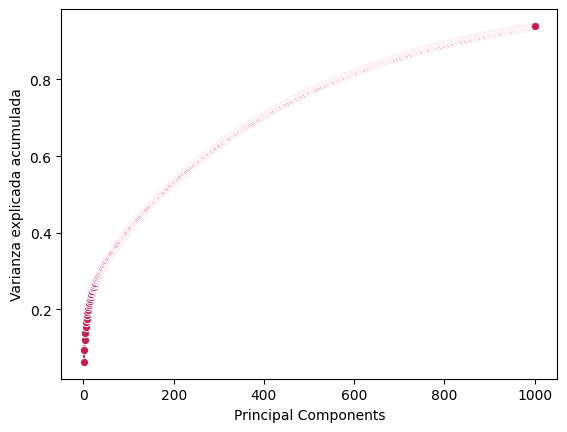

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a PCA model with a specified number of components
pca = PCA(n_components=1000, svd_solver='full')  # You can adjust the number of components

# Fit the PCA model to your data
X_pca = pca.fit_transform(X_scaled)  # X_scaled is your preprocessed data
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

sns.lineplot(data=None, x=range(1, len(explained_variance) + 1), y=cumulative_variance, marker='o', hue=0, palette="rocket")
plt.xlabel('Principal Components')
plt.ylabel('Varianza explicada acumulada')
plt.legend().remove()
plt.show()

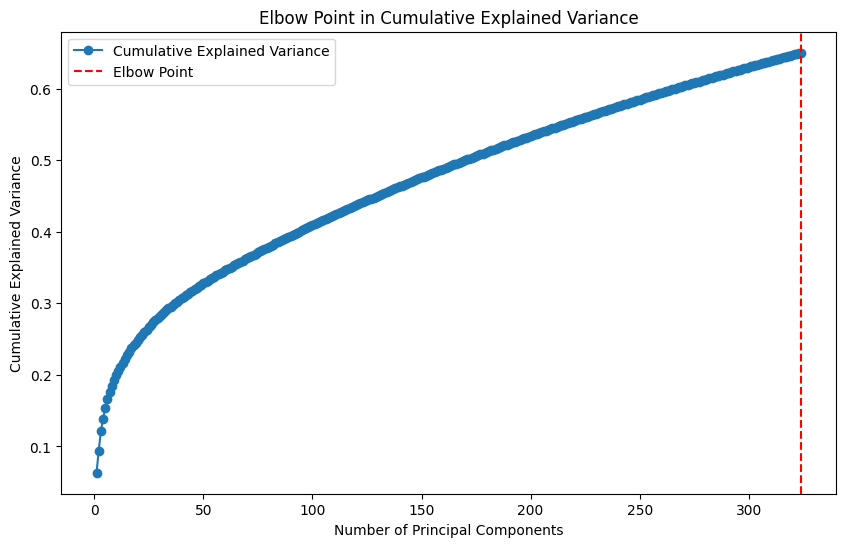

Elbow point at principal component: 324


In [74]:
from kneed import KneeLocator

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Use KneeLocator to find the elbow point
kneedle = KneeLocator(range(1, len(cumulative_variance) + 1), cumulative_variance, curve='convex', direction='increasing')

# Plot the cumulative explained variance and the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axvline(x=kneedle.elbow, color='r', linestyle='--', label='Elbow Point')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Point in Cumulative Explained Variance')
plt.legend()
plt.show()

print(f"Elbow point at principal component: {kneedle.elbow}")

### T-SNE

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Applying t-SNE to reduce dimensions to 3
tsne = TSNE(n_components=3, random_state=0)
x_test_tsne = tsne.fit_transform(X_scaled)  # Assuming x_test_scaled is your standardized test data

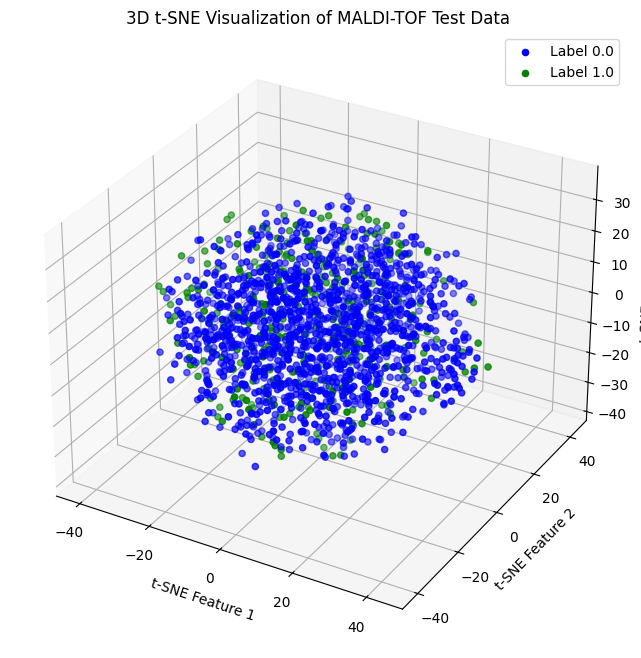

In [28]:

# Plotting the result
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Colors for each label
colors = ["blue", "green"]  # Adjust or expand as needed for the number of labels

for label, color in zip(np.unique(y), colors):
    ax.scatter(
        x_test_tsne[y == label, 0],
        x_test_tsne[y == label, 1],
        x_test_tsne[y == label, 2],
        c=color,
        label=f"Label {label}",
    )

ax.set_xlabel("t-SNE Feature 1")
ax.set_ylabel("t-SNE Feature 2")
ax.set_zlabel("t-SNE Feature 3")
ax.legend()
plt.title("3D t-SNE Visualization of MALDI-TOF Test Data")
plt.show()

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Applying t-SNE to reduce dimensions to 3
tsne = TSNE(n_components=2, random_state=0)
x_test_tsne = tsne.fit_transform(X_scaled)  # Assuming x_test_scaled is your standardized test data


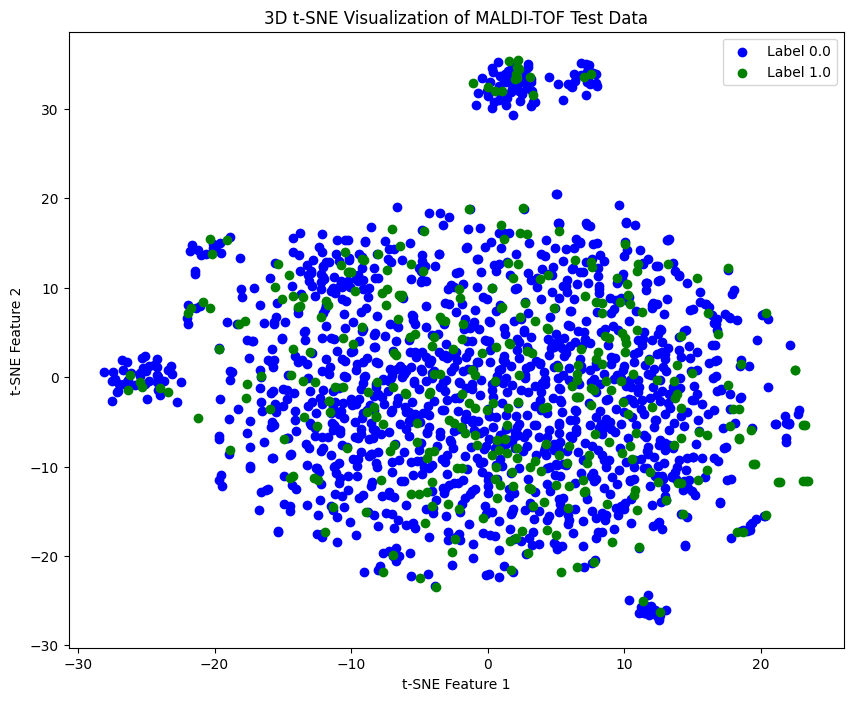

In [30]:
# Plotting the result
fig, ax = plt.subplots(figsize=(10, 8))

# Colors for each label
colors = ["blue", "green"]  # Adjust or expand as needed for the number of labels

for label, color in zip(np.unique(y), colors):
    ax.scatter(
        x_test_tsne[y == label, 0],
        x_test_tsne[y == label, 1],
        c=color,
        label=f"Label {label}",
    )

ax.set_xlabel("t-SNE Feature 1")
ax.set_ylabel("t-SNE Feature 2")
ax.legend()
plt.title("3D t-SNE Visualization of MALDI-TOF Test Data")
plt.show()

Ninguna conclusión

# Balanceo (Under-sampling & Over-sampling)

## Under-sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
rus = RandomUnderSampler(random_state=73, sampling_strategy=0.35)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_undersampled).items()))

[(0.0, 777), (1.0, 272)]


In [85]:
from imblearn.under_sampling import InstanceHardnessThreshold

iht = InstanceHardnessThreshold(random_state=73, estimator=LogisticRegression(), sampling_strategy=0.35)
X_resampled, y_resampled = iht.fit_resample(X_train, y_train.astype(int))
print(sorted(Counter(y_resampled).items()))

c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[(0, 797), (1, 279)]


Logistic Regression con under-sampling aleatorio

In [42]:
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=73)

# Train the model on the training data
log_reg.fit(X_undersampled, y_undersampled)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {accuracy}")

Balanced Accuracy: 0.5195154095701541


In [59]:
from imblearn.under_sampling import TomekLinks

In [63]:
# Apply Tomek Links for under-sampling
tl = TomekLinks(sampling_strategy='majority')
X_tomek, y_tomek = tl.fit_resample(X_train, y_train)
print(sorted(Counter(y_tomek).items()))

[(0.0, 1112), (1.0, 268)]


In [ ]:
from imblearn.over_sampling import SMOTE
X_oversampled, y_oversampled = SMOTE(sampling_strategy=0.8).fit_resample(X_undersampled, y_undersampled)
print(sorted(Counter(y_oversampled).items()))

[(0.0, 777), (1.0, 621)]


Logistic Regression con over-sampling (SMOTE)

In [44]:
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=73)

# Train the model on the training data
log_reg.fit(X_oversampled, y_oversampled)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {accuracy}")

Balanced Accuracy: 0.5089213300892133


Conclusión -> Escoger mejores métodos -> El balanced accuracy ha disminuido

## Siguiente método

In [100]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.value_counts())

(1384, 6000)
(1384,)
(347, 6000)
(347,)
0.0    1109
1.0     275
Name: Erythromycin, dtype: int64


In [10]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler, InstanceHardnessThreshold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Define the pipeline
pipeline = ImbPipeline([
    #('under', RandomUnderSampler(random_state=73, sampling_strategy=0.35)),
    ('over', SMOTE(sampling_strategy=0.8, random_state=73)),
    ('under', InstanceHardnessThreshold(random_state=73, estimator=RandomForestClassifier(), sampling_strategy=0.35)),
    ('log-reg', RandomForestClassifier(random_state=73))
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train.astype(int))
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train.astype(int), cv=5, scoring='balanced_accuracy', verbose=1)

# Print cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

NameError: name 'X_train' is not defined

In [11]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

# Define the features and target variable
X = df_expanded.drop(columns=['Erythromycin', 'Ciprofloxacin'])
y = df_expanded['Erythromycin']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.65)),
    ('over', SMOTE(sampling_strategy=0.35, random_state=73)),
    ('under', InstanceHardnessThreshold(random_state=73, estimator=LogisticRegression(), sampling_strategy=0.75)),
    ('log_reg', LogisticRegression(max_iter=1000, random_state=73))
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train.astype(int))

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {accuracy}")

c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Balanced Accuracy: 0.6246481076008759


c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

# Define the features and target variable
X = df_expanded.drop(columns=['Erythromycin', 'Ciprofloxacin'])
y = df_expanded['Erythromycin']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.65)),
    #('over', SMOTE(sampling_strategy=0.35, random_state=73)),
    #('under', InstanceHardnessThreshold(random_state=73, estimator=LogisticRegression(), sampling_strategy=0.75)),
    ('rf', RandomForestClassifier(class_weight='balanced'))
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train.astype(int))

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {accuracy}")

Balanced Accuracy: 0.5


In [ ]:
from sklearn.svm import SVC

# Define the pipeline
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.65)),
    # ('over', SMOTE(sampling_strategy=0.35, random_state=73)),
    ('under', RandomUnderSampler(random_state=73, sampling_strategy=0.5)),
    ('rf', SVC(kernel='rbf', class_weight='balanced', probability=True))
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train.astype(int))
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train.astype(int), cv=5, scoring='balanced_accuracy', verbose=1)

# Print cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.56654382 0.56646192 0.62317772 0.62760033 0.61624846]
Mean cross-validation score: 0.6000064482417423


In [ ]:
from imblearn.combine import SMOTEENN

# Define the pipeline
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.65)),
    # ('over', SMOTE(sampling_strategy=0.35, random_state=73)),
    # ('under', RandomUnderSampler(random_state=73, sampling_strategy=0.5)),
    ('over-under', SMOTEENN(sampling_strategy=0.5, random_state=73)),
    ('rf', SVC(kernel='rbf', class_weight='balanced', probability=True))
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train.astype(int))
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train.astype(int), cv=5, scoring='balanced_accuracy', verbose=1)

# Print cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.48751024 0.53087633 0.50827191 0.49467649 0.52003291]
Mean cross-validation score: 0.5082735759206348


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

# Define the pipeline
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.65)),
    ('isolation_forest', IsolationForest(contamination=0.1, random_state=73)),
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='balanced_accuracy', verbose=1)

# Print cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\sklearn\metrics\_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\sklearn\metrics\_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\sklearn\metrics\_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\sklearn\metrics\_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Cross-validation scores: [0.43478261 0.33050847 0.35185185 0.34210526 0.36440678]
Mean cross-validation score: 0.36473099558853733


c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\sklearn\metrics\_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy, BinaryFocalCrossentropy
from keras.metrics import Accuracy, AUC

In [23]:
# Define the features and target variable
X = df_expanded.drop(columns=['Erythromycin', 'Ciprofloxacin'])
y = df_expanded['Erythromycin']

#X_scaled = pd.DataFrame(StandardScaler().fit_transform(X))

X_train = X.sample(frac=0.8, replace=False)
X_test = X.drop(X_train.index)
y_train = y.loc[X_train.index]
y_test = y.loc[X_test.index]

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1385, 6000)
X_test shape: (346, 6000)
y_train shape: (1385,)
y_test shape: (346,)


In [17]:
import matplotlib.pyplot as plt

# Plot the distribution of each feature in X_train
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,0.000175,0.000273,0.000231,0.000418,0.000552,0.001136,0.001035,3.257615e-04,0.000191,0.000250,...,0.000047,0.000046,0.000045,0.000047,0.000046,0.000046,0.000044,0.000046,0.000045,0.000045
std,0.000250,0.000268,0.000214,0.000312,0.000372,0.000820,0.000819,2.748920e-04,0.000198,0.000240,...,0.000032,0.000032,0.000032,0.000032,0.000033,0.000033,0.000030,0.000032,0.000031,0.000031
min,0.000000,0.000000,0.000000,0.000000,0.000012,0.000021,0.000011,5.100046e-07,0.000005,0.000004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000002,0.000057,0.000071,0.000173,0.000276,0.000566,0.000416,1.245158e-04,0.000062,0.000104,...,0.000023,0.000022,0.000022,0.000023,0.000021,0.000021,0.000021,0.000022,0.000022,0.000021
50%,0.000061,0.000200,0.000166,0.000354,0.000490,0.000938,0.000835,2.581797e-04,0.000127,0.000186,...,0.000042,0.000040,0.000041,0.000043,0.000041,0.000040,0.000039,0.000040,0.000040,0.000040
75%,0.000266,0.000410,0.000336,0.000600,0.000737,0.001477,0.001428,4.441463e-04,0.000258,0.000330,...,0.000066,0.000065,0.000062,0.000065,0.000066,0.000065,0.000062,0.000064,0.000062,0.000062
max,0.001834,0.002093,0.001450,0.001983,0.002254,0.005464,0.005900,2.199543e-03,0.003024,0.003437,...,0.000207,0.000223,0.000199,0.000207,0.000237,0.000187,0.000191,0.000205,0.000176,0.000190


In [18]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam
from keras.losses import BinaryFocalCrossentropy
from keras.metrics import AUC

In [34]:
from imblearn.keras import BalancedBatchGenerator

# Crear y ajustar el scaler SOLO en el conjunto de entrenamiento
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar la misma transformación al conjunto de test
X_test_scaled = scaler.transform(X_test)

training_generator = BalancedBatchGenerator(
    X_train_scaled, y_train, sampler=RandomUnderSampler(), batch_size=32, random_state=73
)

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryFocalCrossentropy(), metrics=[AUC()])

# Train the model
# model.fit(X_train_scaled, y_train, epochs=50, batch_size=32)

callback_history = model.fit(
    training_generator,
    epochs=10,
    verbose=1,
)

Epoch 1/10


c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - auc_4: 0.5394 - loss: 0.2267
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc_4: 0.6064 - loss: 0.1762
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc_4: 0.6028 - loss: 0.2015
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc_4: 0.6749 - loss: 0.1668
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc_4: 0.6962 - loss: 0.1661
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc_4: 0.7617 - loss: 0.1544
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc_4: 0.8626 - loss: 0.1354
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc_4: 0.8951 - loss: 0.1200
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc_4: 0.9688 - loss: 0.1000
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc_4: 0.9534 - loss: 0.0943


In [35]:
# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Convert predictions to binary labels
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
print(f"Balanced Accuracy: {balanced_accuracy}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Balanced Accuracy: 0.6692496924969249


### QUE HACER

VALIDATION SET

PROBAR AUTOENCODER

PROBAR TODO DENTRO DE LA RED NEURONAL ¿Under sampling, over sampling, PCA...?

¿Y LOS OTROS DOS MODELOS?

PROBAR RNN, DCNN

## HSIC-LASSO

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Define the features and target variable
X = df_expanded.drop(columns=['Erythromycin', 'Ciprofloxacin'])
y = df_expanded['Erythromycin']

X_train = X.sample(frac=0.8, replace=False)
X_test = X.drop(X_train.index)
y_train = y.loc[X_train.index]
y_test = y.loc[X_test.index]

# Crear y ajustar el scaler SOLO en el conjunto de entrenamiento
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("First line of X_train:", X_train_scaled[0])
print("First line of X_test:", X_test_scaled[0])
print("First line of y_train:", y_train.iloc[0])
print("First line of y_test:", y_test.iloc[0])
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

First line of X_train: [0.21822347 0.14130618 0.06313022 ... 0.21225819 0.2025574  0.39746045]
First line of X_test: [0.15278968 0.18874626 0.29015374 ... 0.28246229 0.24568337 0.13305602]
First line of y_train: 0.0
First line of y_test: 0.0
X_train shape: (1385, 6000)
X_test shape: (346, 6000)
y_train shape: (1385,)
y_test shape: (346,)


In [ ]:
from pyHSICLasso import HSICLasso

# Instantiate HSICLasso
hsic_lasso = HSICLasso()

# Fit the model (n_jobs=-1 uses all CPU cores)
hsic_lasso.input(
    X_train_scaled,
    y_train.values,
    featname=["Mass_" + str(i) for i in range(X_train_scaled.shape[1])],
)
hsic_lasso.regression(num_feat=200, B=0, n_jobs=-1)  # Adjust num_feat as needed

# Print selected features
print("Selected features by HSIC-LASSO:", hsic_lasso.get_index())

Block HSIC Lasso B = 1385.
M set to 1.
Using Gaussian kernel for the features, Gaussian kernel for the outcomes.


In [ ]:
model = RandomForestClassifier(max_iter=1000, random_state=0)
model.fit(X_train_scaled[:, hsic_lasso.get_index()], y_train)

# Predicting on the test set
y_pred = model.predict(X_test_scaled[:, hsic_lasso.get_index()])

# Calculating Balanced Accuracy Score
score = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy Score: {score}")
